In [8]:
%matplotlib inline

import collections
import csv
import glob
import os
import pandas as pd 
import matplotlib
import numpy as np

from matplotlib import pyplot as plt

In [9]:
def load_data(path_list):
    data_list = []
    for i, path in enumerate(path_list):
        csv_data = pd.read_csv(path)
        csv_data['id'] = i
        csv_data['path'] = path
        csv_data['dirname'] = os.path.dirname(path)
        data_list.append(csv_data)
    return pd.concat(data_list, sort=False)

In [10]:
path_list = list(glob.iglob('raw_data/**/*.csv', recursive=True))
print('\n'.join(path_list))

raw_data/vae_fix_y_guider_smp10/run_new_impl_gumbel_vae_fix_y_guider3_Nsmp10-tag-eval_accuracy.csv
raw_data/vae_fix_y_guider_smp10/run_new_impl_gumbel_vae_fix_y_guider5_Nsmp10-tag-eval_accuracy.csv
raw_data/vae_fix_y_guider_smp10/run_new_impl_gumbel_vae_fix_y_guider2_Nsmp10-tag-eval_accuracy.csv
raw_data/vae_fix_y_guider_smp10/run_new_impl_gumbel_vae_fix_y_guider1_Nsmp10-tag-eval_accuracy.csv
raw_data/vae_fix_y_guider_smp10/run_new_impl_gumbel_vae_fix_y_guider4_Nsmp10-tag-eval_accuracy.csv
raw_data/vae_meta_weight_smp2/run_new_impl_gumbel_vae_nosup_meta_weight1_Nsmp2-tag-eval_accuracy.csv
raw_data/vae_meta_weight_smp2/run_new_impl_gumbel_vae_nosup_meta_weight2_Nsmp2-tag-eval_accuracy.csv
raw_data/vae_meta_weight_smp2/run_new_impl_gumbel_vae_nosup_meta_weight5_Nsmp2-tag-eval_accuracy.csv
raw_data/vae_meta_weight_smp2/run_new_impl_gumbel_vae_nosup_meta_weight4_Nsmp2-tag-eval_accuracy.csv
raw_data/vae_meta_weight_smp2/run_new_impl_gumbel_vae_nosup_meta_weight3_Nsmp2-tag-eval_accuracy.csv


In [11]:
data = load_data(path_list)

In [18]:
colormaps = [
    matplotlib.cm.Blues,
    matplotlib.cm.Reds,
    matplotlib.cm.Purples,
    matplotlib.cm.Greens,
]

raw_data/vae_fix_y_guider_smp10
raw_data/vae_smp10


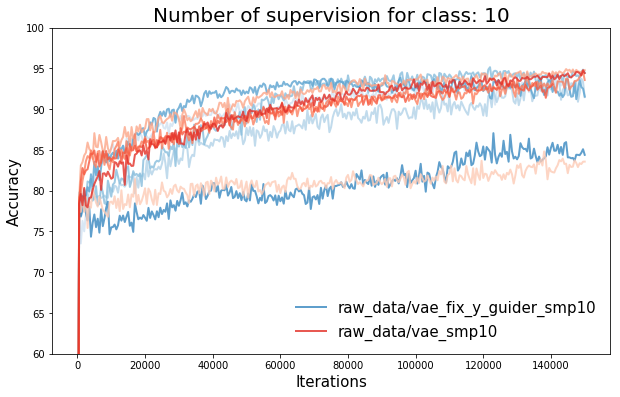

In [22]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
legend = collections.defaultdict(list)
target_data = data[data['dirname'].str.contains('smp10')]
dirname_list = sorted(list(set(target_data['dirname'])))
for i_d, dirname in enumerate(dirname_list):
    print(dirname)
    q_data = target_data.query("dirname == '{}'".format(dirname))
    for i_id, id in enumerate(list(set(q_data['id']))):
        qi_data = q_data.query("id == {}".format(id))
        line = plt.plot(qi_data['Step'], qi_data['Value'] * 100,
                        color=colormaps[i_d](i_id * 30 + 50), label=dirname,
                        linewidth=2, alpha=0.8)
        if i_id == len(list(set(q_data['id']))) - 1:
            legend['lines'].append(line[0])
            legend['labels'].append(dirname)
        
plt.legend(legend['lines'], legend['labels'], frameon=False, fontsize=15)
plt.ylim([60, 100])
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Number of supervision for class: 10', fontsize=20)
plt.show()

raw_data/vae_fix_y_guider_smp2
raw_data/vae_meta_weight_smp2
raw_data/vae_smp2


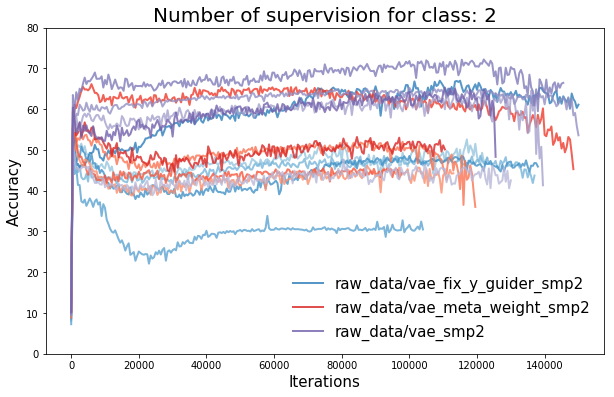

In [21]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
legend = collections.defaultdict(list)
target_data = data[data['dirname'].str.contains('smp2')]
dirname_list = sorted(list(set(target_data['dirname'])))
for i_d, dirname in enumerate(dirname_list):
    print(dirname)
    q_data = target_data.query("dirname == '{}'".format(dirname))
    for i_id, id in enumerate(list(set(q_data['id']))):
        qi_data = q_data.query("id == {}".format(id))
        line = plt.plot(qi_data['Step'], qi_data['Value'] * 100,
                        color=colormaps[i_d](i_id * 20 + 100), label=dirname,
                        linewidth=2, alpha=0.8)
        if i_id == len(list(set(q_data['id']))) - 1:
            legend['lines'].append(line[0])
            legend['labels'].append(dirname)
        
plt.legend(legend['lines'], legend['labels'], frameon=False, fontsize=15)
plt.ylim([0, 80])
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Number of supervision for class: 2', fontsize=20)
plt.show()